In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_hdf("../hdf/train_numeric.hdf")

In [3]:
response = pd.read_hdf("../hdf/train_response.hdf")

In [4]:
tmp = pd.concat([train, response], axis=1)

(array([   0.,    0.,    0.,    0.,    0.,    8.,   11.,   24.,  274.,
         105.,   45.,   32.,   24.,   33.,   23.,   29.,   47.,   27.,
          25.,   31.,   35.,   25.,   40.,   44.,   31.,   35.,   35.,
          27.,   36.,   25.,   34.,   20.,   15.,   12.,   12.,   12.,
           5.,    5.,    1.,    3.,    0.,    0.,    0.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([-0.5  , -0.476, -0.452, -0.428, -0.404, -0.38 , -0.356, -0.332,
        -0.308, -0.284, -0.26 , -0.236, -0.212, -0.188, -0.164, -0.14 ,
        -0.116, -0.092, -0.068, -0.044, -0.02 ,  0.004,  0.028,  0.052,
         0.076,  0.1  ,  0.124,  0.148,  0.172,  0.196,  0.22 ,  0.244,
         0.268,  0.292,  0.316,  0.34 ,  0.364,  0.388,  0.412,  0.436,
         0.46 ,  0.484,  0.508,  0.532,  0.556,  0.58 ,  0.604,  0.628,
         0.652,  0.676,  0.7  ]),
 <a list of 50 Patch objects>)

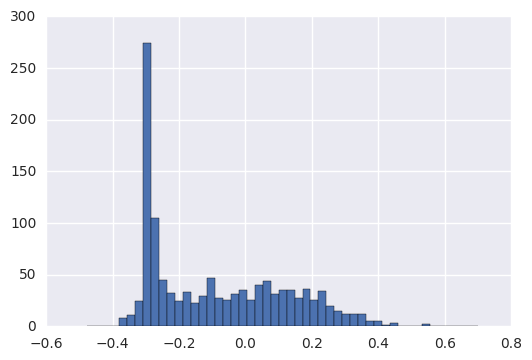

In [7]:
x = tmp[tmp["Response"] == 1.0]["L1_S24_F1844"].values
x = x[~np.isnan(x)]
plt.hist(x, range=(-0.5, 0.7), bins=50)

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.50000000e+02,   8.88000000e+02,
          2.36300000e+03,   3.62400000e+03,   3.64000000e+03,
          3.17200000e+03,   3.53800000e+03,   3.58300000e+03,
          4.19800000e+03,   4.41000000e+03,   4.59900000e+03,
          4.51300000e+03,   5.42100000e+03,   5.39700000e+03,
          5.56400000e+03,   5.82700000e+03,   5.95400000e+03,
          5.82000000e+03,   5.76100000e+03,   5.91800000e+03,
          5.33900000e+03,   5.39600000e+03,   4.80700000e+03,
          4.66900000e+03,   4.41100000e+03,   3.99000000e+03,
          3.51400000e+03,   3.29000000e+03,   3.05500000e+03,
          2.25100000e+03,   1.95200000e+03,   1.66000000e+03,
          1.17500000e+03,   7.79000000e+02,   5.03000000e+02,
          3.03000000e+02,   1.77000000e+02,   7.30000000e+01,
          3.10000000e+01,   1.30000000e+01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

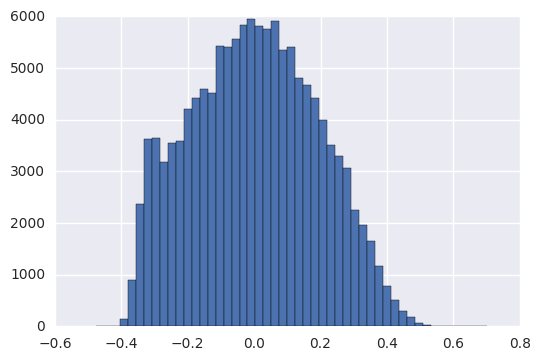

In [8]:
x = tmp[tmp["Response"] == 0.0]["L1_S24_F1844"].values
x = x[~np.isnan(x)]
plt.hist(x, range=(-0.5, 0.7), bins=50)